<a href="https://colab.research.google.com/github/snajme/FinTechML/blob/main/NominalandRealFedFundsRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier

np.set_printoptions(linewidth=195, edgeitems=5)


- Date
- Consumer Price Index for All Urban Consumers
- Difference
- Real Fed Funds

## Nominal vs. Real Interest Rate: What's the Difference?
### Nominal Interest Rate
### Real Interest Rate
$$Real Interest Rate = Nominal Interest Rate - Projected Rate of Inflation$$

In [24]:
data = pd.read_csv('Nominal and Real Fed Funds Rate.csv')
data_1 = data.dropna()

data_1

,DATE,DFF,CPIAUCSL,Real Fed Funds,USRECM
1,01/07/1954,0.80,0.26129,0.53871,1.0
2,01/08/1954,1.22,0.00000,1.22000,1.0
3,01/09/1954,1.07,-0.29751,1.36751,1.0
4,01/10/1954,0.85,-0.85343,1.70343,1.0
5,01/11/1954,0.83,-0.26071,1.09071,1.0
...,...,...,...,...,...
668,01/02/2010,0.13,2.15134,-2.02134,1.0
669,01/03/2010,0.16,2.28617,-2.12617,1.0
670,01/04/2010,0.20,2.20677,-2.00677,1.0
671,01/05/2010,0.20,2.00355,-1.80355,1.0


### Creating Synthetic Data

In [17]:

%config IPCompleter.greedy = True
from sklearn.model_selection import train_test_split
n_samples, n_features = 124, 15
np.random.seed(5)
X = np.random.random_sample(n_samples)*2*np.pi - np.pi
X = X.reshape((-1, 1))
y = np.sin(X) + (np.random.random_sample(n_samples)*0.1).reshape((-1,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

x_i = np.linspace(-np.pi, np.pi, 200)
x_i = x_i.reshape((-1, 1))
y_i = np.sin(x_i)
print('{} Training samples'.format(X_train.shape[0]))
print('{} Testing samples'.format(X_test.shape[0]))


83 Training samples
41 Testing samples


[]

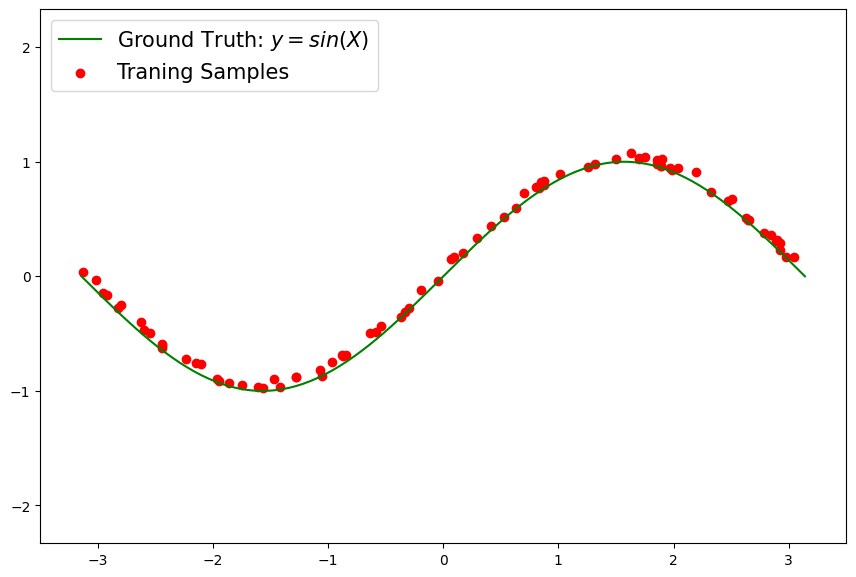

In [18]:
scale_factor = 0.65
plt.figure(figsize=(16*scale_factor, 10.667*scale_factor))
plt.axis([-3.5, 3.5, -2.33, 2.33])
plt.plot(x_i, y_i, c='green', label='Ground Truth: $y=sin(X)$')
plt.scatter(X_train, y_train, c='red', label='Traning Samples')
plt.legend(loc='upper left', fontsize=15)
plt.plot()

# Comparing the Two Dataset

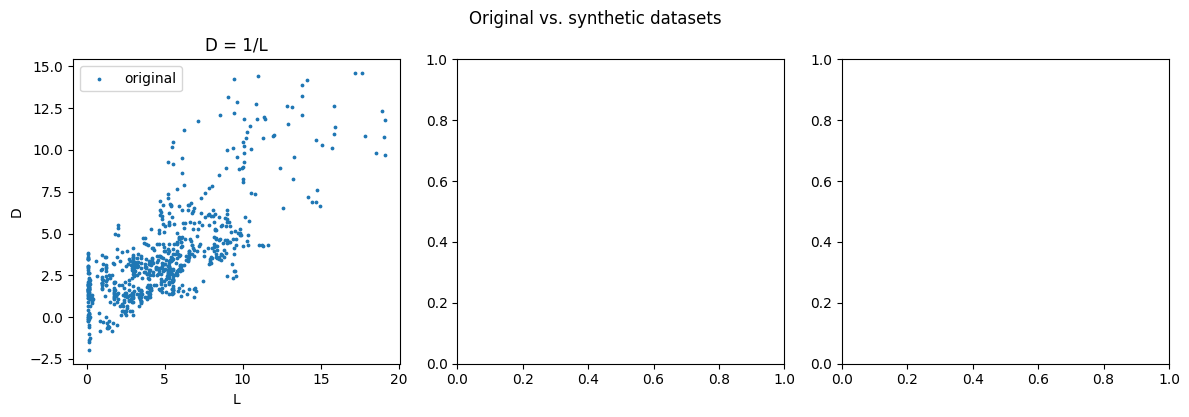

In [4]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.scatter(data.DFF, data.CPIAUCSL, s=3, label='original')
ax1.set_xlabel('L')
ax1.set_ylabel('D')
ax1.set_title('D = 1/L')
ax1.legend()
plt.tight_layout()
plt.suptitle('Original vs. synthetic datasets', y=1.03)
plt.show()

# Regularisation For the Syntatic Dataset

# Regularisation For the Original Dataset